In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

**Copiar dados em um Dataframe**

In [4]:
# Carregar o arquivo CSV
dados = pd.read_csv('/kaggle/input/indice-desenvolviment-humano-brasil/idh.csv')
dados.head()

,ano_referencia,idh,idh_feminino,idh_masculino,expectativa_de_vida,expectativa_de_vida_feminina,expectativa_de_vida_masculina,expectativa_de_anos_escola,expectativa_de_anos_escola_feminina,expectativa_de_anos_escola_masculina
0,1991,0.616,0.0,0.0,66.31,69.33,63.44,12.33,0.0,0.0
1,1992,0.622,0.0,0.0,66.71,69.78,63.80,12.55,0.0,0.0
2,1993,0.630,0.0,0.0,67.11,70.18,64.19,12.77,0.0,0.0
3,1994,0.638,0.0,0.0,67.57,70.65,64.64,12.99,0.0,0.0
4,1995,0.646,0.0,0.0,67.92,71.09,64.90,13.22,0.0,0.0


Tendência temporal do IDH

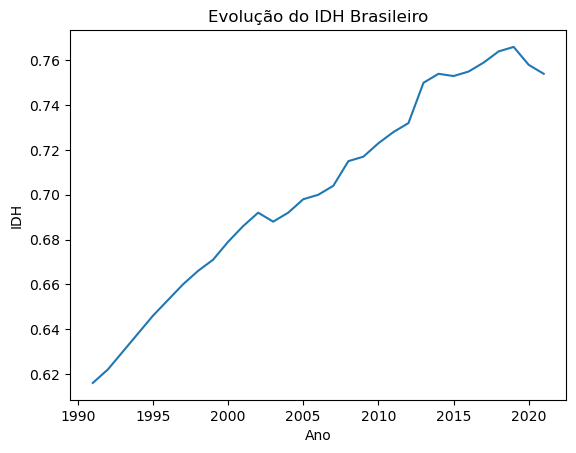

In [5]:
plt.plot(dados['ano_referencia'], dados['idh'])
plt.xlabel('Ano')
plt.ylabel('IDH')
plt.title('Evolução do IDH Brasileiro')
plt.show()

Disparidade de gênero no IDH

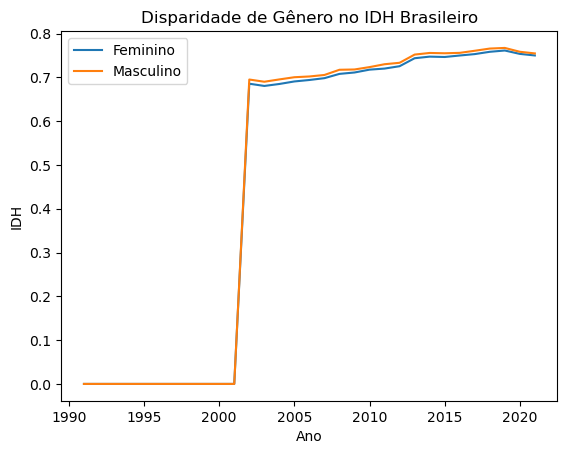

In [6]:
plt.plot(dados['ano_referencia'], dados['idh_feminino'], label='Feminino')
plt.plot(dados['ano_referencia'], dados['idh_masculino'], label='Masculino')
plt.xlabel('Ano')
plt.ylabel('IDH')
plt.title('Disparidade de Gênero no IDH Brasileiro')
plt.legend()
plt.show()

Expectativa de vida

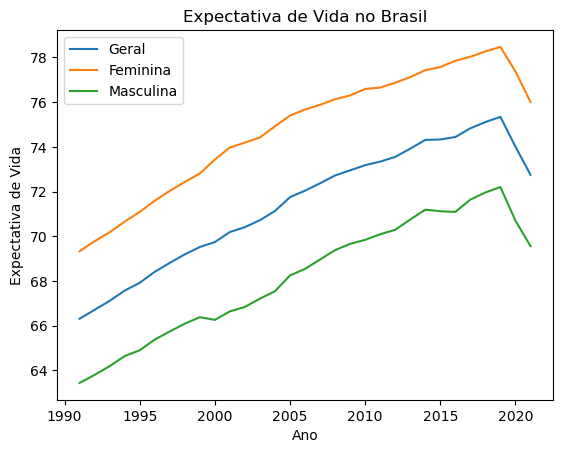

In [7]:
plt.plot(dados['ano_referencia'], dados['expectativa_de_vida'], label='Geral')
plt.plot(dados['ano_referencia'], dados['expectativa_de_vida_feminina'], label='Feminina')
plt.plot(dados['ano_referencia'], dados['expectativa_de_vida_masculina'], label='Masculina')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de Vida no Brasil')
plt.legend()
plt.show()

Educação

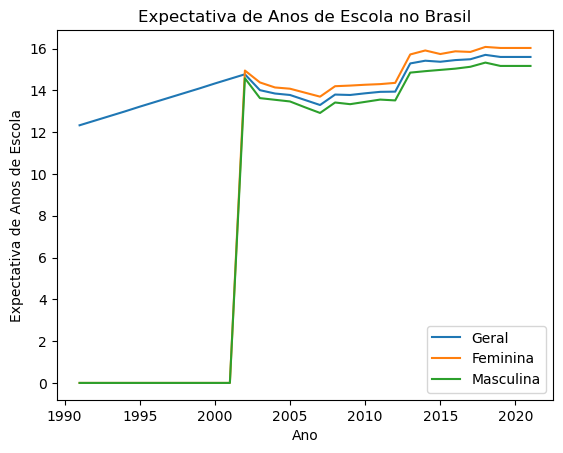

In [8]:
plt.plot(dados['ano_referencia'], dados['expectativa_de_anos_escola'], label='Geral')
plt.plot(dados['ano_referencia'], dados['expectativa_de_anos_escola_feminina'], label='Feminina')
plt.plot(dados['ano_referencia'], dados['expectativa_de_anos_escola_masculina'], label='Masculina')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Anos de Escola')
plt.title('Expectativa de Anos de Escola no Brasil')
plt.legend()
plt.show()

Correlações

In [9]:
correlacoes = dados[['idh', 'expectativa_de_vida', 'expectativa_de_anos_escola']].corr()
print(correlacoes)

                                 idh  expectativa_de_vida  \
idh                         1.000000             0.984038   
expectativa_de_vida         0.984038             1.000000   
expectativa_de_anos_escola  0.880600             0.803483   

                            expectativa_de_anos_escola  
idh                                           0.880600  
expectativa_de_vida                           0.803483  
expectativa_de_anos_escola                    1.000000  


Calculando estatísticas resumidas do IDH ao longo dos anos

In [10]:
estatisticas_idh = dados.groupby('ano_referencia')['idh'].describe()
print(estatisticas_idh)

                count   mean  std    min    25%    50%    75%    max
ano_referencia                                                      
1991              1.0  0.616  NaN  0.616  0.616  0.616  0.616  0.616
1992              1.0  0.622  NaN  0.622  0.622  0.622  0.622  0.622
1993              1.0  0.630  NaN  0.630  0.630  0.630  0.630  0.630
1994              1.0  0.638  NaN  0.638  0.638  0.638  0.638  0.638
1995              1.0  0.646  NaN  0.646  0.646  0.646  0.646  0.646
1996              1.0  0.653  NaN  0.653  0.653  0.653  0.653  0.653
1997              1.0  0.660  NaN  0.660  0.660  0.660  0.660  0.660
1998              1.0  0.666  NaN  0.666  0.666  0.666  0.666  0.666
1999              1.0  0.671  NaN  0.671  0.671  0.671  0.671  0.671
2000              1.0  0.679  NaN  0.679  0.679  0.679  0.679  0.679
2001              1.0  0.686  NaN  0.686  0.686  0.686  0.686  0.686
2002              1.0  0.692  NaN  0.692  0.692  0.692  0.692  0.692
2003              1.0  0.688  NaN 

Gráfico de barras da expectativa de vida média por ano

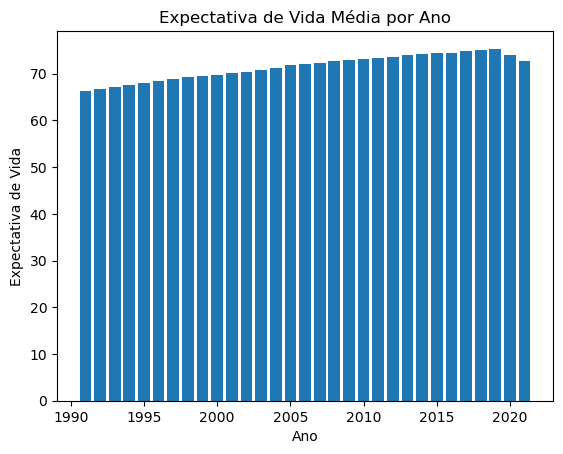

In [11]:
plt.bar(dados['ano_referencia'], dados['expectativa_de_vida'])
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de Vida Média por Ano')
plt.show()


Suavização exponencial simples para o IDH

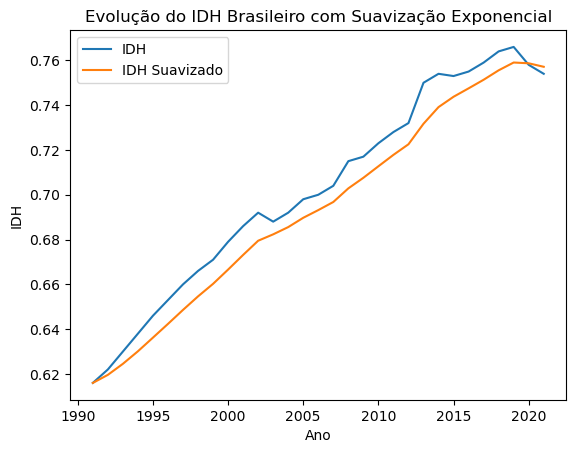

In [12]:
dados['idh_suavizado'] = dados['idh'].ewm(span=5).mean()

plt.plot(dados['ano_referencia'], dados['idh'], label='IDH')
plt.plot(dados['ano_referencia'], dados['idh_suavizado'], label='IDH Suavizado')
plt.xlabel('Ano')
plt.ylabel('IDH')
plt.title('Evolução do IDH Brasileiro com Suavização Exponencial')
plt.legend()
plt.show()


Matriz de correlação de Pearson para as variáveis específicas

In [13]:

variaveis = ['idh', 'expectativa_de_vida', 'expectativa_de_anos_escola']
correlacoes_pearson = dados[variaveis].corr(method='pearson')
print(correlacoes_pearson)


                                 idh  expectativa_de_vida  \
idh                         1.000000             0.984038   
expectativa_de_vida         0.984038             1.000000   
expectativa_de_anos_escola  0.880600             0.803483   

                            expectativa_de_anos_escola  
idh                                           0.880600  
expectativa_de_vida                           0.803483  
expectativa_de_anos_escola                    1.000000  


Coeficiente de Gini para o IDH

In [22]:

ano_referencia = dados['ano_referencia']
idh = dados['idh']

# Ordenar os dados pelo IDH
dados_ordenados = sorted(zip(ano_referencia, idh), key=lambda x: x[1])

# Calcular a soma acumulada dos valores de IDH
soma_acumulada = np.cumsum([x[1] for x in dados_ordenados])

# Calcular o coeficiente de Gini
n = len(idh)
coeficiente_gini = (n + 1 - 2 * np.sum(soma_acumulada)) / n

print("Coeficiente de Gini para o IDH:", coeficiente_gini)


Coeficiente de Gini para o IDH: -20.635483870967743


Regressão Linear

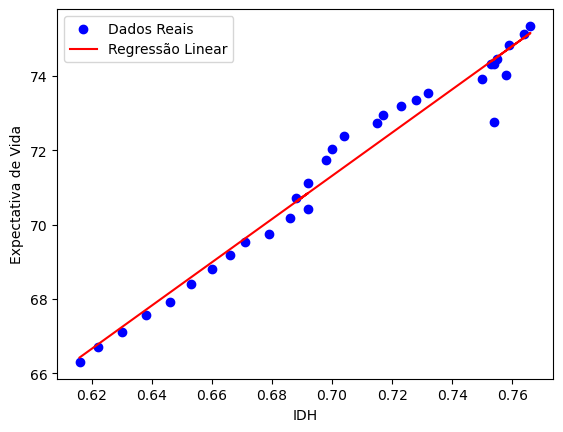

In [27]:
from sklearn.linear_model import LinearRegression

# Extrair as colunas relevantes do DataFrame
idh = dados['idh']
expectativa_de_vida = dados['expectativa_de_vida']

# Criar o objeto de regressão linear
regressao = LinearRegression()

# Ajustar o modelo de regressão linear
regressao.fit(idh.values.reshape(-1, 1), expectativa_de_vida.values.reshape(-1, 1))

# Prever os valores de expectativa_de_vida usando o modelo ajustado
expectativa_de_vida_predita = regressao.predict(idh.values.reshape(-1, 1))

# Plotar os pontos de dados reais e a linha de regressão
plt.scatter(idh, expectativa_de_vida, color='blue', label='Dados Reais')
plt.plot(idh, expectativa_de_vida_predita, color='red', label='Regressão Linear')
plt.xlabel('IDH')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.show()